In [1]:
from keras.models import load_model
import pathlib as pl
import json
import pandas as pd
import numpy as np
from datetime import datetime,date,time
from pandas.tseries.offsets import BDay

/home/techstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model('psg_model1.h5')

In [3]:
with open("argmm.json","r") as f:
    arg_min_max = json.load(f)
Min = arg_min_max["Min"]
Max = arg_min_max["Max"]

In [4]:
(Min,Max)

(50, 116536)

In [7]:
filepath = pl.Path("/home/techstar/data/pyprojects/metro_cq/sr_input.csv")

In [8]:
df = pd.read_csv(filepath)
df['datetime']=pd.to_datetime(df['datetime'])
df = df.set_index("datetime")

In [12]:
X = (df-Min)/(Max-Min)

In [29]:
TIMESTEPS = 36 * 5
STEP = 36 * 1

serieses=[]
nextday=[]

for i in range(0,len(X)-TIMESTEPS+STEP,STEP): # use len(X)-TIMESTEPS+1 or len(X)-TIMESTEPS+STEP to include the last sample
    serieses.append(np.array(X.iloc[i: i + TIMESTEPS]))
    #nextday.append(np.array(X.iloc[i + TIMESTEPS:i+TIMESTEPS+STEP]))

In [30]:
X_input=np.array(serieses)

In [31]:
X_input.shape

(2, 180, 1)

In [32]:
X_input = X_input.reshape(X_input.shape[0],5,36)

In [33]:
Y_pred=model.predict(X_input)

In [38]:
Y_pred.shape

(2, 36)

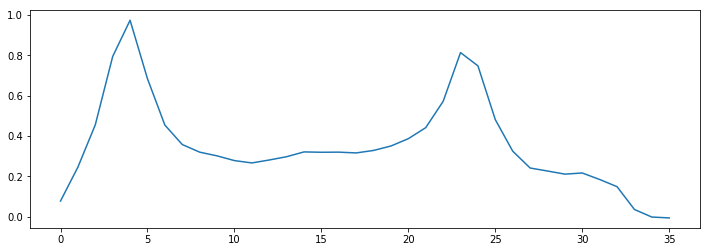

In [36]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

plt.plot(Y_pred[0,:])
plt.show()

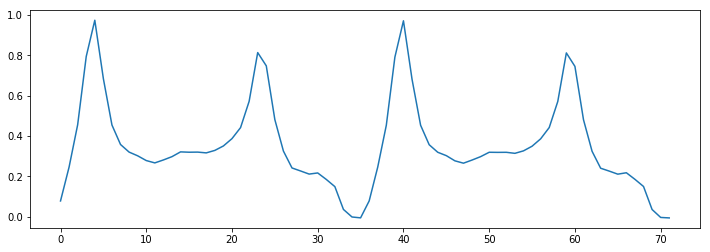

In [45]:
plt.plot(Y_pred.flatten())

In [80]:
rg_bd = pd.date_range(df.index.date[0]+BDay(5),periods=X_input.shape[0], freq="B")

In [68]:
from pandas.tseries.offsets import BDay

In [74]:
set(df.index.date)

{datetime.date(2017, 1, 13),
 datetime.date(2017, 1, 16),
 datetime.date(2017, 1, 17),
 datetime.date(2017, 1, 18),
 datetime.date(2017, 1, 19),
 datetime.date(2017, 1, 20)}

In [81]:
rg_bd

DatetimeIndex(['2017-01-20', '2017-01-23'], dtype='datetime64[ns]', freq='B')

In [15]:
df.to_json(filepath.parent.joinpath("sr_input.json"))

In [11]:
df = pd.read_json(filepath.parent.joinpath("sr_input.json"))

In [13]:
df.index

DatetimeIndex(['2017-01-13 06:00:00', '2017-01-13 06:30:00',
               '2017-01-13 07:00:00', '2017-01-13 07:30:00',
               '2017-01-13 08:00:00', '2017-01-13 08:30:00',
               '2017-01-13 09:00:00', '2017-01-13 09:30:00',
               '2017-01-13 10:00:00', '2017-01-13 10:30:00',
               ...
               '2017-01-20 19:00:00', '2017-01-20 19:30:00',
               '2017-01-20 20:00:00', '2017-01-20 20:30:00',
               '2017-01-20 21:00:00', '2017-01-20 21:30:00',
               '2017-01-20 22:00:00', '2017-01-20 22:30:00',
               '2017-01-20 23:00:00', '2017-01-20 23:30:00'],
              dtype='datetime64[ns]', length=216, freq=None)

In [14]:
df = df["2017-1-14":]

In [20]:
df.index[-36:]+BDay(1)

DatetimeIndex(['2017-01-23 06:00:00', '2017-01-23 06:30:00',
               '2017-01-23 07:00:00', '2017-01-23 07:30:00',
               '2017-01-23 08:00:00', '2017-01-23 08:30:00',
               '2017-01-23 09:00:00', '2017-01-23 09:30:00',
               '2017-01-23 10:00:00', '2017-01-23 10:30:00',
               '2017-01-23 11:00:00', '2017-01-23 11:30:00',
               '2017-01-23 12:00:00', '2017-01-23 12:30:00',
               '2017-01-23 13:00:00', '2017-01-23 13:30:00',
               '2017-01-23 14:00:00', '2017-01-23 14:30:00',
               '2017-01-23 15:00:00', '2017-01-23 15:30:00',
               '2017-01-23 16:00:00', '2017-01-23 16:30:00',
               '2017-01-23 17:00:00', '2017-01-23 17:30:00',
               '2017-01-23 18:00:00', '2017-01-23 18:30:00',
               '2017-01-23 19:00:00', '2017-01-23 19:30:00',
               '2017-01-23 20:00:00', '2017-01-23 20:30:00',
               '2017-01-23 21:00:00', '2017-01-23 21:30:00',
               '2017-01-

In [21]:
s=df.to_json()

In [22]:
s

'{"count":{"1484546400000":9120,"1484548200000":27253,"1484550000000":52049,"1484551800000":90725,"1484553600000":111189,"1484555400000":81708,"1484557200000":57157,"1484559000000":48194,"1484560800000":44295,"1484562600000":40870,"1484564400000":39219,"1484566200000":37168,"1484568000000":38305,"1484569800000":38766,"1484571600000":43148,"1484573400000":44113,"1484575200000":43719,"1484577000000":43027,"1484578800000":42343,"1484580600000":43742,"1484582400000":46219,"1484584200000":50455,"1484586000000":65468,"1484587800000":92737,"1484589600000":86278,"1484591400000":57406,"1484593200000":41785,"1484595000000":34219,"1484596800000":29956,"1484598600000":27692,"1484600400000":27025,"1484602200000":23674,"1484604000000":18139,"1484605800000":4678,"1484607600000":836,"1484609400000":110,"1484632800000":8100,"1484634600000":24433,"1484636400000":48071,"1484638200000":87879,"1484640000000":108764,"1484641800000":80095,"1484643600000":57299,"1484645400000":48431,"1484647200000":44371,"148